In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

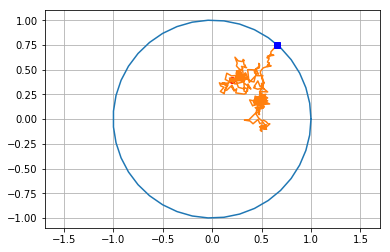

In [71]:
#Brownianmotion function
def brownianmotion(X, delta): # X=(x,y)
    liste_x = [X[0]]
    liste_y = [X[1]]
    i = 0
    while ((liste_x[-1]**2+liste_y[-1]**2) <=1) & (i <100000):
        nouvelle_position_x = liste_x[-1] + np.sqrt(delta)*np.random.randn(1)
        nouvelle_position_y = liste_y[-1] + np.sqrt(delta)*np.random.randn(1)
        liste_x.append(nouvelle_position_x)
        liste_y.append(nouvelle_position_y)
        i+=1
    
    Xinter = np.array([-2.0,-2.0])
    
    if (liste_x[-1]**2+liste_y[-1]**2) >=1:
        derniers_x = np.array(liste_x[-2:len(liste_x)]).reshape(2,)
        derniers_y = np.array(liste_y[-2:len(liste_y)]).reshape(2,)
        
        a,b = np.polyfit(derniers_x,derniers_y,deg=1)
        #a,b = np.polyfit([liste_x[-2],liste_x[-1]],[liste_y[-2],liste_y[-1]],deg=1)
        
        x1 = (-a*b + np.sqrt((a**2-b**2+1)))/(1+a**2)
        x11 = (-a*b - np.sqrt((a**2-b**2+1)))/(1+a**2)

        if (x1>=liste_x[-2] and x1<=liste_x[-1]) or (x1<=liste_x[-2] and x1>=liste_x[-1]):
            Xinter[0] = x1
            Xinter[1] = a*x1+b
            
        else:
            Xinter[0] = x11
            Xinter[1] = a*x11+b
        
    
    return (liste_x,liste_y,Xinter)


# Paramètres
delta = 0.001
X_init = np.array([0.2,0.4])

# Plot cercle
theta = np.linspace(0, 2*np.pi, 40)
x_cos = np.cos(theta)
y_sin = np.sin(theta)
plt.plot(x_cos, y_sin)
plt.axis("equal")
plt.grid()


# Plot position initiale
plt.plot(X_init[0],X_init[1],"ro")

# Trajectoire
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)


# Plot Xinter
if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")




    
    

(-1.0965951735409205,
 1.0998378654067105,
 -1.0993190013341618,
 1.1035410682428655)

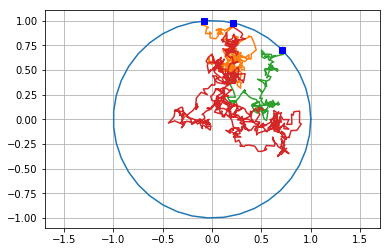

In [74]:
# Paramètres
delta = 0.001
X_init = np.array([0.2,0.4])

# Plot cercle
theta = np.linspace(0, 2*np.pi, 40)
x_cos = np.cos(theta)
y_sin = np.sin(theta)
plt.plot(x_cos, y_sin)
plt.axis("equal")
plt.grid()


# Plot position initiale
plt.plot(X_init[0],X_init[1],"ro")

# Trajectoire 1
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)

if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")
    
    
# Trajectoire 2 
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)

if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")
    
    
# Trajectoire 3
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)

if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")



# Exercise 2

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

(375, 500, 3)


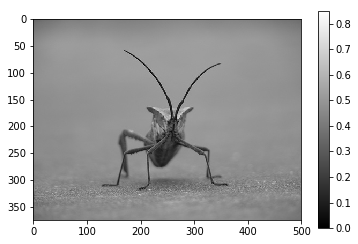

In [2]:
filename = r'stinkbug.png'

img = mpimg.imread(filename)
print(img.shape)

plt.imshow(img,origin="upper", cmap='gray', interpolation = 'nearest')
plt.colorbar()
plt.show()

(375, 500)


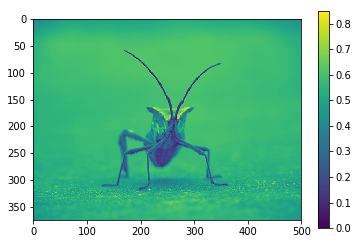

In [3]:
lum_img = img[:,:,0]
taille_img = lum_img.shape
print(lum_img.shape)
plt.imshow(lum_img,origin="upper", cmap='viridis', interpolation = 'nearest')
plt.colorbar()
plt.show()

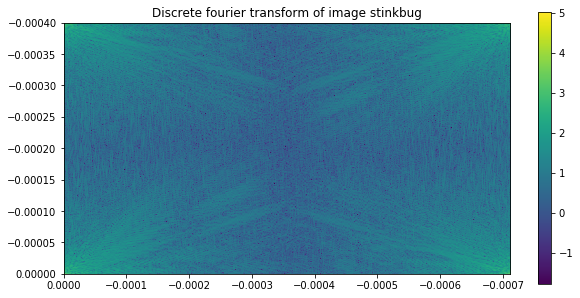

In [102]:
freq_row = np.fft.fftfreq(taille_img[0],d=0.01)/taille_img[0] #fréquences normalisées suivant x
freq_col = np.fft.fftfreq(taille_img[1],d=0.01)/taille_img[1] #fréquences normalisées suivant y


fourier_transform = np.fft.fft2(lum_img) 
modulus = np.abs(fourier_transform)
plt.figure(figsize=(10,5))
plt.imshow(np.log10(modulus), extent = [freq_row[0],freq_row[-1],freq_col[0],freq_col[-1]]) 
#On utilise le log pour régler le problème de différence d'échelle.
plt.title('Discrete fourier transform of image stinkbug')
plt.colorbar()


3. (a) Les fréquences nulles sont situées dans les coins.

Text(0.5,1,'Shifted discrete fourier transform of image stinkbug')

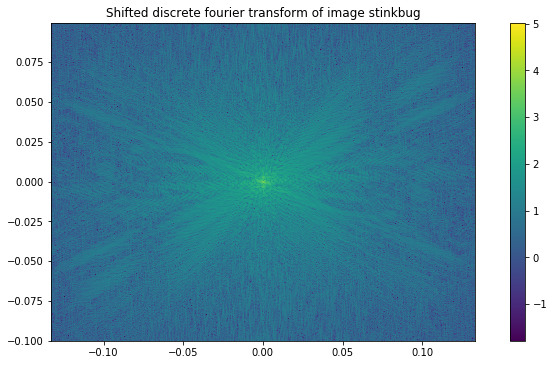

In [104]:
sh_freq_row = np.fft.fftshift(freq_row)
sh_freq_col = np.fft.fftshift(freq_col)


fourier_transform_center=np.fft.fftshift(fourier_transform)
modulus_center= np.abs(fourier_transform_center)
plt.figure(figsize=(10,5))
plt.imshow(np.log10(modulus_center), extent = [sh_freq_row[0],sh_freq_row[-1],sh_freq_col[0],sh_freq_col[-1]])
plt.colorbar()
plt.title('Shifted discrete fourier transform of image stinkbug')

3. (b) Maintenant après le shift, les fréquences nulles sont au centre.

In [106]:
# lowpassfilter2D function
def lowpassfilter2D (img,fc):
    taille_img = img.shape
    
    freq_row = np.fft.fftfreq(taille_img[0],d=0.01)/taille_img[0] #fréquences normalisées suivant x
    freq_col = np.fft.fftfreq(taille_img[1],d=0.01)/taille_img[1] #fréquences normalisées suivant y
    
    sh_freq_row = np.fft.fftshift(freq_row) # fréquences centrées en 0 suivant x
    sh_freq_col = np.fft.fftshift(freq_col) # fréquences centrées en 0 suivant y
    
    fc_normalisée_x = fc/taille_img[0] # normalisation de la fréquence de coupure suivant x
    fc_normalisée_y = fc/taille_img[1] # normalisation de la fréquence de coupure suivant y
    rayon_fc_square = fc_normalisée_x**2 + fc_normalisée_y**2 # rayon du disque que l'on garde 
    fourier_transform = np.fft.fft2(img) # transformée de fourier de l'image
    fourier_transform_center=np.fft.fftshift(fourier_transform) # centrage de la transformée de fourier

    for i in range(taille_img[0]):
        for j in range(taille_img[1]):
            # mise à 0 des pixels correspondant à une fréquence plus élevée que fc
            if sh_freq_row[i]**2 + sh_freq_col[j]**2 >= rayon_fc_square :
                fourier_transform_center[i,j]=0
                
   
    fourier_transform_retour = np.fft.ifftshift(fourier_transform_center)  # fourier transform non centrée de l'image filtrée
    
    img_low_freq = np.fft.ifft2(fourier_transform_retour) # image filtrée à partir de la fft2 (avec des erreurs d'arrondi)
    return(img_low_freq, fourier_transform_center)
    


/home/cindy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


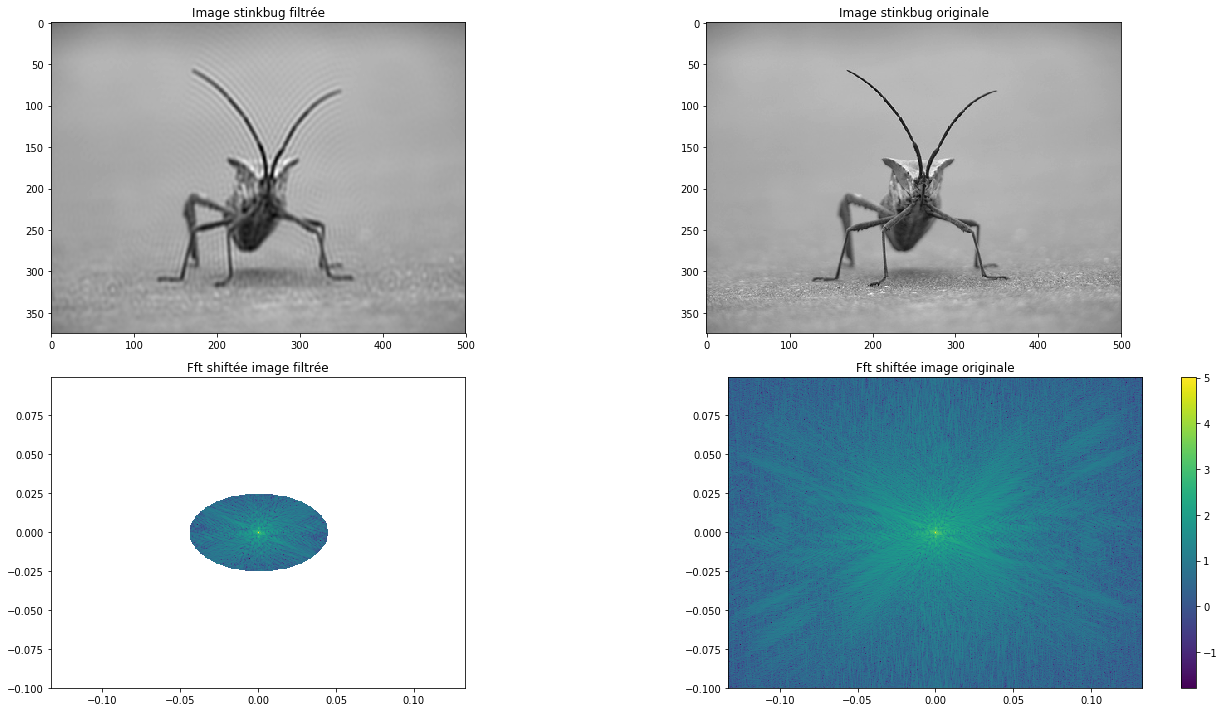

In [121]:
fc = 10 # fréquence de coupure
img_low_freq,fourier_filtered_center = lowpassfilter2D (lum_img,fc)

plt.subplots(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Image stinkbug filtrée')
plt.imshow(np.abs(img_low_freq),cmap='gray')

plt.subplot(2,2,2)
plt.imshow(lum_img ,cmap='gray')
plt.title('Image stinkbug originale')

plt.subplot(2,2,3)
plt.imshow(np.log10(np.abs(fourier_filtered_center)), extent = [min(freq_row),max(freq_row),min(freq_col),max(freq_col)])
plt.title('Fft shiftée image filtrée')


plt.subplot(2,2,4)
plt.imshow(np.log10(modulus_center), extent = [sh_freq_row[0],sh_freq_row[-1],sh_freq_col[0],sh_freq_col[-1]])
plt.title('Fft shiftée image originale')

plt.colorbar()
plt.tight_layout()